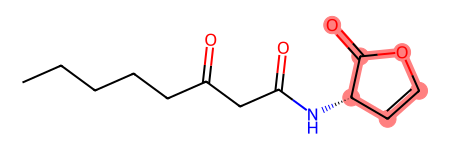

In [5]:
from rdkit import Chem
from rdkit.Chem import MurckoDecompose
from rdkit.Chem.Scaffolds import MurckoScaffold

# annotate Bemis-Murcko scaffold

mol = Chem.MolFromMolFile('/sharefs/share/sbdd_data/test_set/TRAR_RHIRD_1_234_0/1l3l_A_rec_1l3l_lae_lig_tt_min_0.sdf')
scaffold = MurckoDecompose(mol)
# scaffold = MurckoScaffold.GetScaffoldForMol(mol)

# annotate Bemis-Murcko scaffold in red color and the rest of the molecule in blue color
from rdkit.Chem.Draw import IPythonConsole

# prepare the drawing
# compute 2D coordinates for the molecule
mol.Compute2DCoords()
mol.GetSubstructMatches(scaffold)
mol

In [17]:
from rdkit import Chem
from rdkit.Chem import MurckoDecompose
from rdkit.Chem.Scaffolds import MurckoScaffold

# annotate Bemis-Murcko scaffold

mol = Chem.MolFromMolFile('853_std.sdf')
gen_mol = Chem.MolFromMolFile('853.sdf')
scaffold = MurckoDecompose(mol)
scaffold = MurckoScaffold.GetScaffoldForMol(mol)

# annotate Bemis-Murcko scaffold in red color and the rest of the molecule in blue color
from rdkit.Chem.Draw import IPythonConsole

# prepare the drawing
# compute 2D coordinates for the molecule
# mol.Compute2DCoords()
# mol.GetSubstructMatches(scaffold)
# mol

In [9]:
import os

ligand_fn = gen_mol.GetProp('_Name')
protein_fn = os.path.join(
    '/sharefs/share/sbdd_data/test_set',
    os.path.dirname(ligand_fn),
    os.path.basename(ligand_fn)[:10] + '.pdb'
)
pocket = Chem.MolFromPDBFile(protein_fn)

In [6]:
import numpy as np
from rdkit.Chem import rdMolTransforms

def get_mol_centroid(mol, confId=-1):
    conformer = mol.GetConformer(confId)
    centroid = np.mean(conformer.GetPositions(), axis=0)
    return centroid

def trans(x, y, z):
    translation = np.eye(4)
    translation[:3, 3] = [x, y, z]
    return translation

def centralize(mol, confId=-1, centroid=None):
    conformer = mol.GetConformer(confId)
    if centroid is None:
        centroid = get_mol_centroid(mol, confId)
    translation = trans(-centroid[0], -centroid[1], -centroid[2])  
    rdMolTransforms.TransformConformer(conformer, translation)
    return mol


In [20]:
ligand_fn

'CDK6_HUMAN_1_312_0/2f2c_B_rec_1xo2_fse_lig_tt_min_0.sdf'

In [15]:
pocket_centroid = get_mol_centroid(pocket)
mol = centralize(mol, centroid=pocket_centroid)
# Chem.MolToMolFile(mol, '853_aligned1.sdf')

In [19]:
pocket_centroid

array([26.6106186 , 67.16661387, 51.25795276])

In [12]:
mol_centroid = get_mol_centroid(mol)
pocket_centroid, mol_centroid

(array([26.6106186 , 67.16661387, 51.25795276]),
 array([  6.16900045,  -8.30470911, -17.10638133]))

In [18]:
mol_pos = mol.GetConformer().GetPositions()
(mol_pos - pocket_centroid) / 2

array([[ 4.6096907 , -5.58230694, -9.74997638],
       [ 4.6156907 , -4.86830694, -9.77447638],
       [ 4.1286907 , -4.44280694, -9.37997638],
       [ 3.6646907 , -4.84230694, -8.96497638],
       [ 3.6646907 , -5.56980694, -8.94047638],
       [ 4.1321907 , -5.94180694, -9.34897638],
       [ 4.0756907 , -3.70130694, -9.39097638],
       [ 3.5336907 , -3.37180694, -8.96797638],
       [ 3.0881907 , -3.76230694, -8.56347638],
       [ 3.1696907 , -4.47080694, -8.56997638],
       [ 4.4541907 , -3.32080694, -9.73847638],
       [ 3.4741907 , -2.66730694, -8.97597638],
       [ 4.1031907 , -6.64330694, -9.34897638],
       [ 2.5461907 , -3.58180694, -8.10497638],
       [ 2.4701907 , -2.92280694, -7.85047638],
       [ 1.9471907 , -2.76480694, -7.40547638],
       [ 1.4861907 , -3.26530694, -7.20697638],
       [ 1.5266907 , -3.92430694, -7.44997638],
       [ 2.0441907 , -4.09530694, -7.89197638],
       [ 1.0406907 , -4.37430694, -7.20947638],
       [ 0.9986907 , -3.08580694, -6.782

In [13]:
mol = centralize(mol)
Chem.MolToMolFile(mol, '853_aligned2.sdf')

In [8]:
import pickle

mask_path = '/sharefs/share/sbdd_data/Mask_cd_test.pkl'
ligand_filename = mol.GetProp('_Name')
with open(mask_path, 'rb') as f:
    scaffold_mask = pickle.load(f)
name2mask = {
    item[0]: item[1] for item in scaffold_mask
}

ligand_filename = gen_mol.GetProp('_Name')
scaffold_mask = name2mask.get(ligand_filename, None)
scaffold_mask

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False, False,  True,  True,  True,  True,  True,  True, False,
        False])

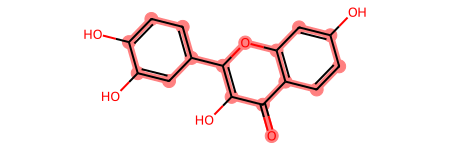

In [16]:
# pick the scaffold atoms according to the scaffold mask

scaffold_atoms = [atom.GetIdx() for atom in mol.GetAtoms() if scaffold_mask[atom.GetIdx()]]

# color the scaffold atoms in red and the rest of the molecule in blue
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

# prepare the drawing
# compute 2D coordinates for the molecule
mol.Compute2DCoords()
mol.__sssAtoms = scaffold_atoms

mol

In [23]:
import numpy as np

def find_closest_unique_points(A, B):
    Na = A.shape[0]
    Nb = B.shape[0]

    # Step 1: Compute the distance matrix
    distances = np.linalg.norm(A[:, np.newaxis] - B[np.newaxis, :, :], axis=2)

    # Step 2: Create a list to hold the unique closest points
    unique_closest_points = []
    used_indices = []

    # Step 3: Iterate over each point in A to find the closest unique point in B
    # for i in range(Na):
    #     # Get the indices of the sorted distances for the i-th point in A
    #     sorted_indices = np.argsort(distances[i])
        
    #     # Find the closest unique point in B
    #     for idx in sorted_indices:
    #         if idx not in used_indices:
    #             used_indices.append(idx)
    #             unique_closest_points.append(B[idx])
    #             break
    # Step 3: While we still need unique points
    while len(unique_closest_points) < Na:
        # Find the minimum distance that hasn't been matched yet
        min_distance = np.inf
        min_index_a = -1
        min_index_b = -1

        for i in range(Na):
            for j in range(Nb):
                if j not in used_indices and distances[i, j] < min_distance:
                    min_distance = distances[i, j]
                    min_index_a = i
                    min_index_b = j

        # Add the selected point from B and mark it as used
        if min_index_a != -1 and min_index_b != -1:
            unique_closest_points.append(B[min_index_b])
            used_indices.append(min_index_b)

    return used_indices, np.array(unique_closest_points)

# Example Usage
A = np.random.rand(5, 3)  # Replace with your points in A
B = np.random.rand(10, 3)  # Replace with your points in B
used_indices, unique_closest_points = find_closest_unique_points(A, B)

print(A)
print(B)
print("Unique closest points in B:", unique_closest_points)
print("Indices of the closest points in B:", used_indices)


[[0.85700498 0.61150147 0.0360637 ]
 [0.27159128 0.63509323 0.00923789]
 [0.83171091 0.25718632 0.72777205]
 [0.69270235 0.14487596 0.1635856 ]
 [0.37442423 0.85363899 0.42845063]]
[[0.70757338 0.89192727 0.53065481]
 [0.12680896 0.86363906 0.64257694]
 [0.19291524 0.34953487 0.65607332]
 [0.46720015 0.662841   0.29799884]
 [0.98133865 0.47245838 0.02583667]
 [0.97041143 0.20339948 0.42397012]
 [0.84587226 0.81857704 0.35241797]
 [0.5338064  0.08024032 0.32773186]
 [0.71478895 0.66329134 0.88419996]
 [0.78871069 0.12115189 0.37395251]]
Unique closest points in B: [[0.98133865 0.47245838 0.02583667]
 [0.46720015 0.662841   0.29799884]
 [0.97041143 0.20339948 0.42397012]
 [0.78871069 0.12115189 0.37395251]
 [0.12680896 0.86363906 0.64257694]]
Indices of the closest points in B: [4, 3, 5, 9, 1]


In [2]:
from rdkit import Chem
from rdkit.Chem.QED import qed
import sys
sys.path.append('..')
from core.evaluation.utils.sascorer import compute_sa_score

# annotate Bemis-Murcko scaffold
mol = Chem.SDMolSupplier('327_correct.sdf')[0]
ligand_filename = mol.GetProp('_Name')

from eval_utils import ModelResults
ref = ModelResults('Reference', '/sharefs/share/sbdd_data/all_results/crossdocked_test_vina_docked.pt')
ref.load_vina_docked()
for r in ref.flat_results:
    if r['ligand_filename'] == ligand_filename:
        ref_mol = r['mol']
        ref_qed = r['chem_results']['qed']
        ref_sa = r['chem_results']['sa']
        ref_dock = r['vina']['dock'][0]['affinity']
        ref_score = r['vina']['score_only'][0]['affinity']
        ref_min = r['vina']['minimize'][0]['affinity']
        break

qed_score = qed(mol)
sa_score = compute_sa_score(mol)
aff_score = mol.GetProp('vina_score')
aff_min = mol.GetProp('vina_minimize')

print('QED:', qed_score, ref_qed)
print('SA:', sa_score, ref_sa)
print('Affinity:', aff_score, ref_score)
print('Minimized Affinity:', aff_min, ref_min)
print('Docked Affinity:', ref_dock)

Reference loaded 100 vina docked results
QED: 0.46527030930196706 0.5282896655660706
SA: 0.86 0.91
Affinity: -7.803 -5.778
Minimized Affinity: -7.796 -5.743
Docked Affinity: -6.1


In [12]:
from glob import glob

sdf_files = glob('../mols-inpaint/mols-vina_sa_ref20/*.sdf')

opt_mols = []
for file in sdf_files:
    mol = Chem.SDMolSupplier(file)[0]
    if mol.GetProp('_Name') == ligand_filename:
        opt_mols.append(mol)

len(opt_mols), len(sdf_files)
    # qed_score = qed(mol)
    # sa_score = compute_sa_score(mol)
    # aff_score = mol.GetProp('vina_score')
    # aff_min = mol.GetProp('vina_minimize')
    # print(file, qed_score, sa_score, aff_score, aff_min)

(10, 992)

,qed,sa,vina score,vina min,mol
0,0.802974,0.87,-6.867,-7.125,
1,0.770217,0.84,-8.158,-8.127,
2,0.893133,0.95,-7.165,-7.337,
3,0.750025,0.86,-7.849,-7.971,
4,0.266096,0.74,-6.979,-7.052,
5,0.413167,0.80,-7.366,-7.466,
6,0.645103,0.88,-7.43,-7.616,
7,0.713091,0.84,-7.197,-7.483,
8,0.627225,0.83,-6.82,-7.176,
9,0.458342,0.63,-7.09,-7.306,

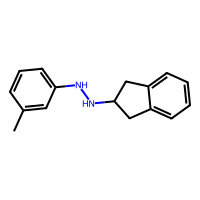
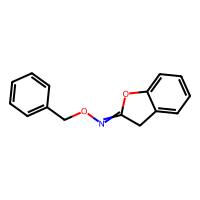
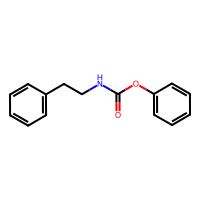
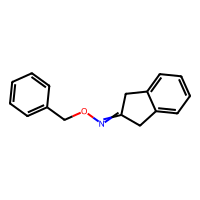
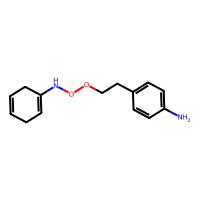
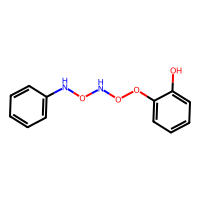
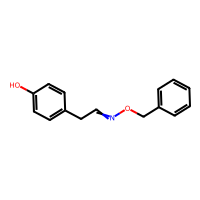
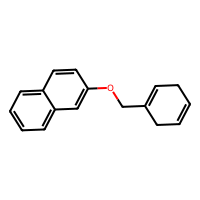
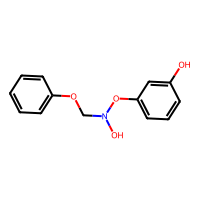
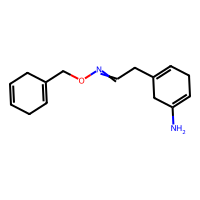

In [20]:
# draw all the optimized molecules using pandas tools

import pandas as pd
from rdkit.Chem import PandasTools

opt_result = [{'qed': qed(mol), 'sa': compute_sa_score(mol), 'vina score': mol.GetProp('vina_score'), 'vina min': mol.GetProp('vina_minimize'), 'mol': mol} for mol in opt_mols]
opt_df = pd.DataFrame(opt_result)
PandasTools.RenderImagesInAllDataFrames(images=True)
# PandasTools.AddMoleculeColumnToFrame(opt_df, smilesCol='vina_score')
# display horizontally
opt_df


In [24]:
with Chem.SDWriter('327_opt.sdf') as w:
    w.write(opt_result[2]['mol'])


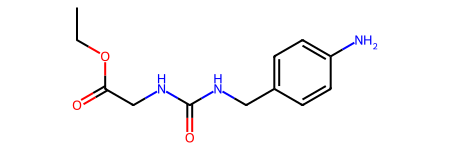

In [22]:
ref_mol.Compute2DCoords()
ref_mol